# Music Generator
## COMP 432 Fall 2020
## Natalia Whiteley 40044353 and Michael Naccache 27...

In [133]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from music21 import *

In [134]:
VERBOSE = True
GENRES = ['sample']
INSTRUMENTS = [instrument.Piano, instrument.Bass, instrument.Guitar, instrument.Saxophone, instrument.Trumpet]
PALETTE = 'husl'

## Part 1: Import Dataset

Here we define some helper functions for loading files and parsing the midi format. Then, we load the midi files and thier genres as X and y respectively.

In [152]:
# given the name of a midi file, returns a 2D array of notes per instrument
def import_midi(midi_file, verbose=VERBOSE):

    # parse midi file
    midi = converter.parse(midi_file)
  
    # seperate based on instrument
    midi_parts = instrument.partitionByInstrument(midi)

    notes = {}
    notes_to_parse = []

    for part in midi_parts.parts:
        # only use instruments we want
        if any(isinstance(part.getInstrument(), x) for x in INSTRUMENTS):
            notes[str(part.getInstrument().bestName())] = []
            notes_to_parse = part.recurse()

            # finding whether a particular element is note or a chord
            for element in notes_to_parse: 
                #note
                if isinstance(element, note.Note):
                    notes[str(part.getInstrument().bestName())].append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes[str(part.getInstrument().bestName())].append('.'.join(str(n.pitch) for n in element))

    # remove any empty instruments
    notes = {k: np.array(v) for k, v in notes.items() if v}

    if verbose:
        print('Finished importing {}.'.format(midi_file))

    return notes

# gets the path and label for every file in a directory and its sub-directories
def get_all_files_in_dir(dir_path, verbose=VERBOSE):
    midis = []
    genres = []

    for root, dirs, files in os.walk(dir_path):
        genre = os.path.basename(root)

        # if genre not in list, ignore it
        if genre in GENRES:
            # load all midi files in this directory
            for file in files:
                if file.endswith('.mid'):
                    midis.append(os.path.join(root, file))
                    genres.append(genre)
            
            if verbose:
                print('Loaded all {} midi files.'.format(genre))

    return midis, genres


In [153]:
midi_filenames, genres = get_all_files_in_dir('./midi_files')
songs = [import_midi(x) for x in midi_filenames]

Loaded all sample midi files.
Finished importing ./midi_files/sample/a_cottage_for_sale_rs.mid.
Finished importing ./midi_files/sample/2_of_a_kind_jp.mid.
Finished importing ./midi_files/sample/500_miles_high-Chick-Corea_ee.mid.
Finished importing ./midi_files/sample/a_day_in_the_life_of_a_fool_jhall.mid.


## Part 2: Data Analysis

Text(0.5, 1.0, 'Genre Distribution')

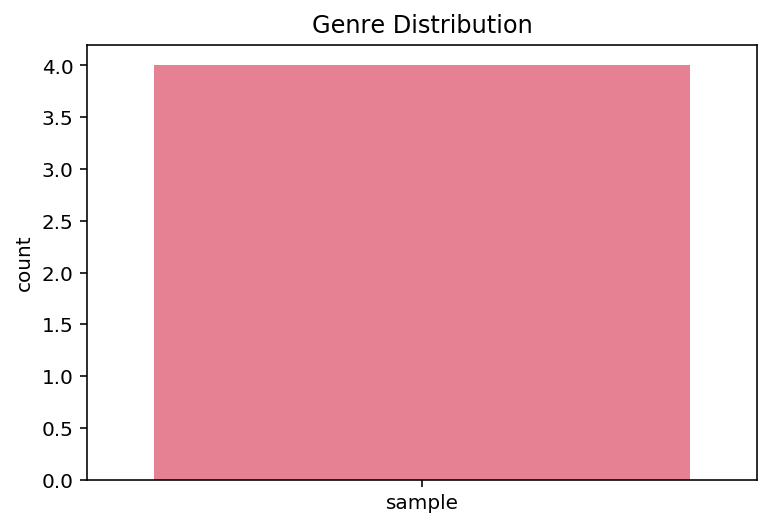

In [154]:
# graph distribution of genres
sns.countplot(genres, palette=PALETTE)
plt.title('Genre Distribution')

In [155]:
# graph note distribution in one song
def plot_notes_per_instrument(song, song_name):
    fig, ax = plt.subplots(len(song.keys()), 1, figsize=(10, 5))
    fig.suptitle('Note distribution in by instrument {}'.format(song_name))
    
    i = 0
    for instrument in song.keys():        
        sns.countplot(song[instrument], ax=ax[i], palette=PALETTE)
        ax[i].set_title(instrument)
        ax[i].tick_params(axis='x', labelsize=5, labelrotation=45)
        i += 1

With the note distributions, you can see that some instruments have an excess of notes played only a single time that don't add much to the general composition.

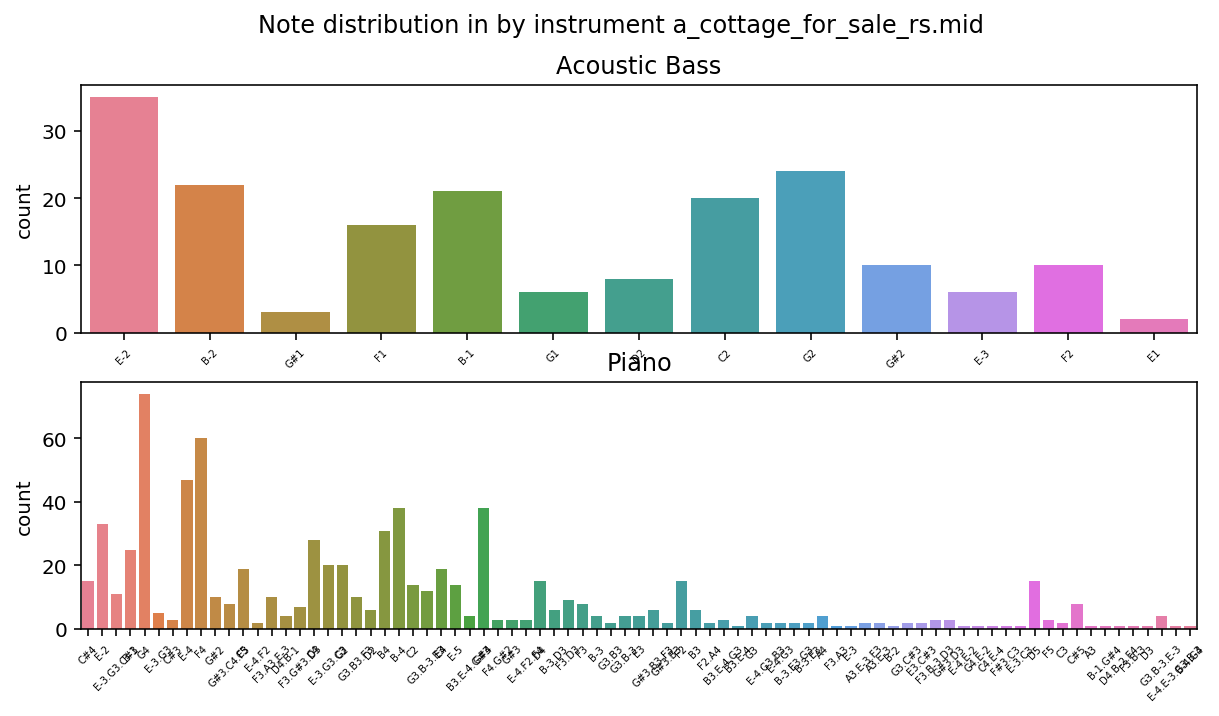

In [156]:
plot_notes_per_instrument(songs[0], os.path.basename(midi_filenames[0]))

## Part 3: Split and Normalize Dataset

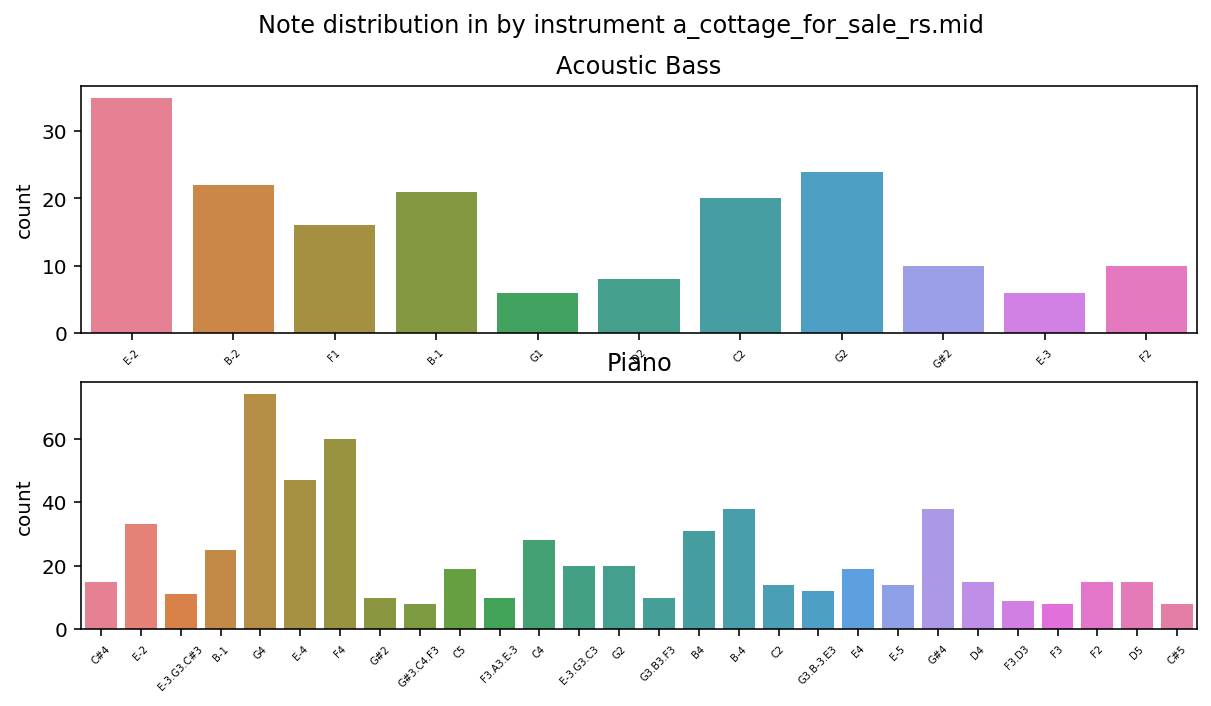

In [159]:
# remove any unfrequent notes; ie. less than 10% of the max frequency
def remove_unfrequent_notes(song):
    # select each instrument track
    for instrument in song.keys():
        freq = Counter(song[instrument])

        # get the max feuquency of notes
        max_freq = freq.most_common(1)[0][1]

        # make list of all the significant notes
        frequent_notes = [note for note in song[instrument] if freq[note] >= max_freq * 0.10]
        new_song = []
        for note in song[instrument]:
            if note in frequent_notes:
                new_song.append(note)
        
        song[instrument] = new_song

    return song

# show new, adjusted note distribution
songs = [remove_unfrequent_notes(song) for song in songs]
plot_notes_per_instrument(songs[0], os.path.basename(midi_filenames[0]))

In [ ]:
# convert notes to ints



# convert genres to ints

In [ ]:
# create X and y from int-encoded categories
X = 
y = 

# split into train and test


## Part 3: Train GAN With Magenta/Wavenet

## Part 5: Results

In [ ]:
# TODO: make function that compares notes in training data with generated results

## Sources

* https://www.analyticsvidhya.com/blog/2020/01/how-to-perform-automatic-music-generation/
* https://www.kaggle.com/wfaria/midi-music-data-extraction-using-music21